# Анализ соц. опроса в ПМ-1701

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import networkx as nx
import glob

In [2]:
directory = '..\data/*.xls' 
files = glob.glob(directory)[0]
files

'..\\data\\socio.xls'

## Считываем всевозможные листы регулярным выражением

In [3]:
df = pd.read_excel(files, None)
sheetnames = list(df.keys())
for x in range(1, len(sheetnames)):
    exec('M%x = pd.read_excel(files, sheet_name = sheetnames[x])' % x)

In [4]:
description = pd.read_excel('../data/socio.xls', sheet_name='Description', skiprows=4, index_col=0) #описание исходных данных

In [5]:
description

,Вопрос
Лист,
M1,1.С кем бы Вы хотели сидеть за одной партой?
M2,2.С кем бы Вы НЕ хотели сидеть за одной партой?
M3,3.Кого бы Вы хотели пригласить на свой День Ро...
M4,4.Кого бы Вы НЕ хотели пригласить на свой День...
M5,5.Кого бы Вы назначили старостой группы?
M6,6.Кого бы Вы НЕ назначили старостой группы?
M7,7.С кем из своих одногруппников Вы бы хотели п...
M8,8.С кем из своих одногруппников Вы бы НЕ хотел...
M9,9.Кого из одногруппников Вы считаете своим дру...


## Построение социматриц

In [6]:
def matrix_unite(data_1, data_2):
    '''Объединяет две социоматрицы с положительными
    и отрицательными признаками под одному вопросу, например, 
    матрицы 
    
    С кем бы Вы хотели сидеть за одной партой?
    С кем бы Вы НЕ хотели сидеть за одной партой?
    
    и считает число отданных и полученных выборов
    '''
    data = data_1 - data_2
    data['+'] = data_1.sum(axis=1)
    data['-'] = data_2.sum(axis=1)
    data['out'] = data['+'] + data['-'] #надо как-то убрать повторные пересчёты
    data.loc['+'] = data_1.sum(axis=0)
    data.loc['-'] = data_2.sum(axis=0)
    data.loc['in'] = data.loc['+'] + data.loc['-']
    data.loc['+', '+'] = data_1.sum(axis=1).sum()
    data.loc['-', '-'] = data_2.sum(axis=1).sum()
    data.loc['in', 'out'] = (data.loc['in']).sum()
    data = data.fillna(0)
    return data


In [7]:
M10 = M1.copy()
M10.loc[:, :] = 0

In [8]:
question_1 = matrix_unite(M1, M2) 
question_2 = matrix_unite(M3, M4)
question_3 = matrix_unite(M5, M6)
question_4 = matrix_unite(M7, M8)
question_5 = matrix_unite(M9, M10)
summary = question_1 + question_2 + question_3 + question_4 + question_5

## Социограммы

In [9]:
def visualisation(table,name):
    cmap  = plt.cm.cividis
    plt.figure(figsize=(15, 10))
    plt.title(description.loc[name][0])
    G = nx.DiGraph(np.array(table))
    values =list(table.sum(axis=0)[0:14].to_dict().values())
    #nx.draw_networkx_labels(G,pos=nx.shell_layout(G),labels = dictir)
    nc = nx.draw(G, pos=nx.shell_layout(G), with_labels=True, \
             node_color= values, node_size=1000, cmap=cmap,\
            vmin = min(values),vmax = max(values))

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(values), vmax=max(values)))
    sm._A = []
    plt.colorbar(sm)
    
    plt.show() 

### 1. С кем бы Вы хотели сидеть за одной партой?

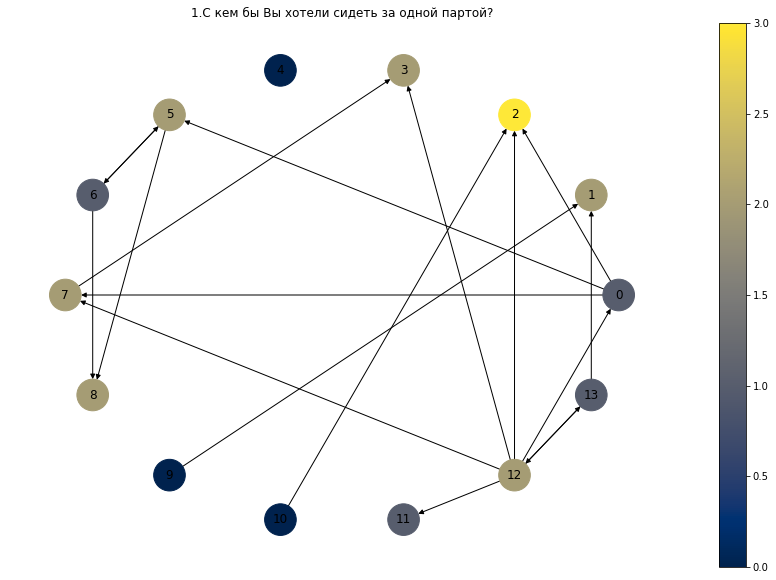

In [10]:
visualisation(M1,'M1')

### 2. С кем бы НЕ Вы хотели сидеть за одной партой?

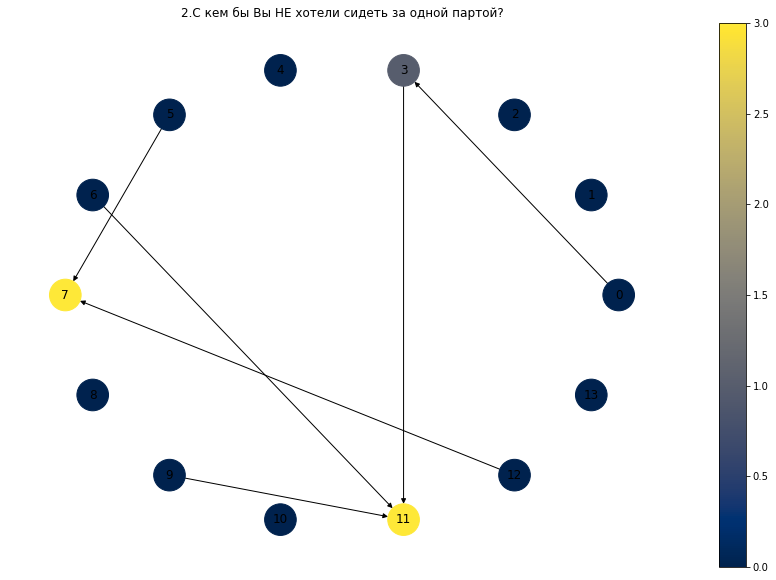

In [11]:
visualisation(M2,'M2')

### 3. Кого бы Вы хотели пригласить на свой День Рождения

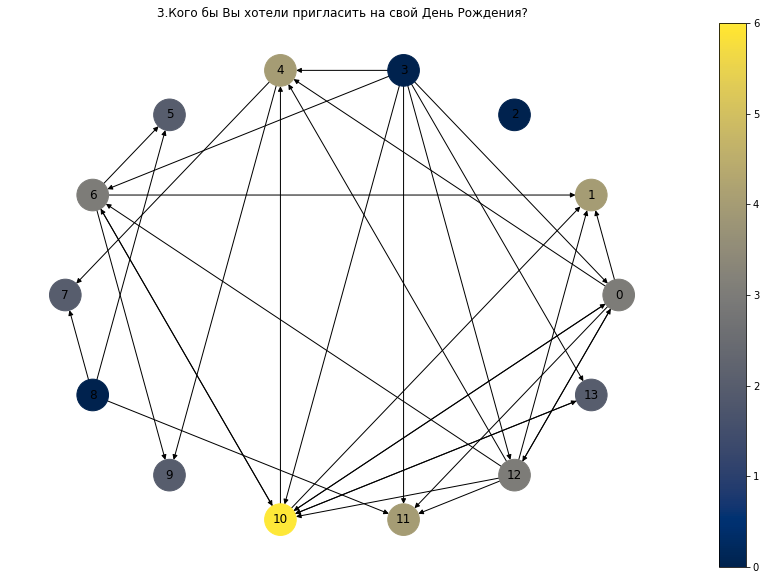

In [12]:
visualisation(M3,'M3')

### 4. Кого бы Вы НЕ хотели пригласить на свой День Рождения?

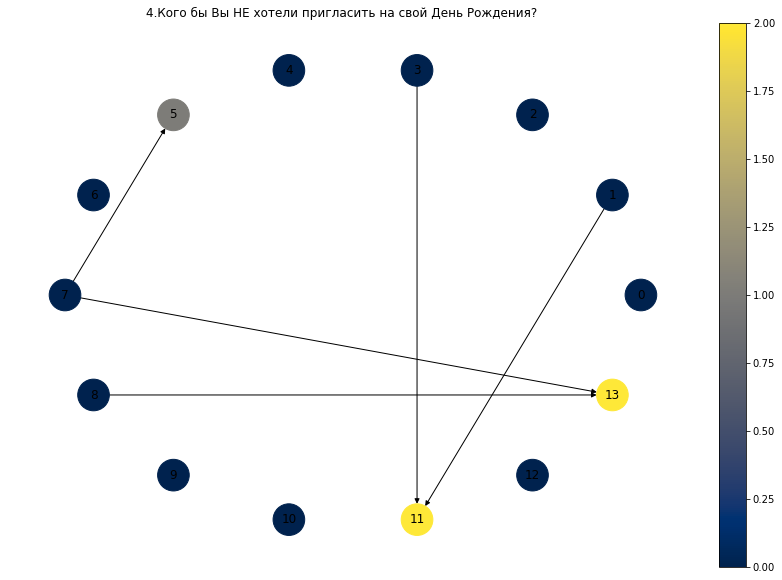

In [13]:
visualisation(M4,'M4')

### 5. Кого бы Вы назначили старостой группы?

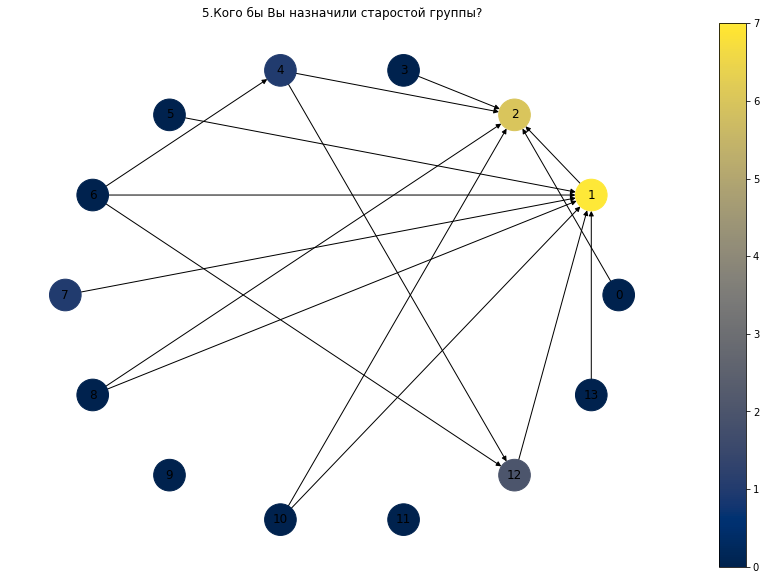

In [14]:
visualisation(M5,'M5')

### 6. Кого бы Вы НЕ назначили старостой группы?

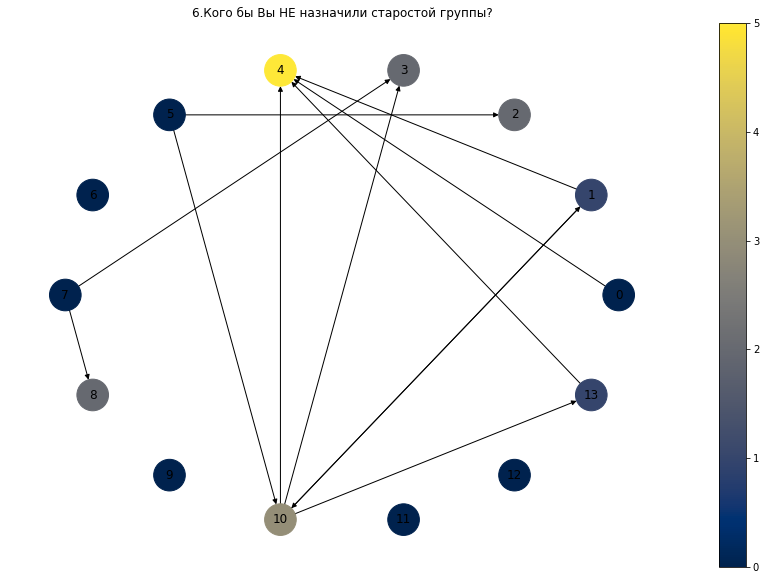

In [15]:
visualisation(M6,'M6')

### 7. С кем из своих одногруппников Вы бы хотели принять участие в реализации сложного проекта?

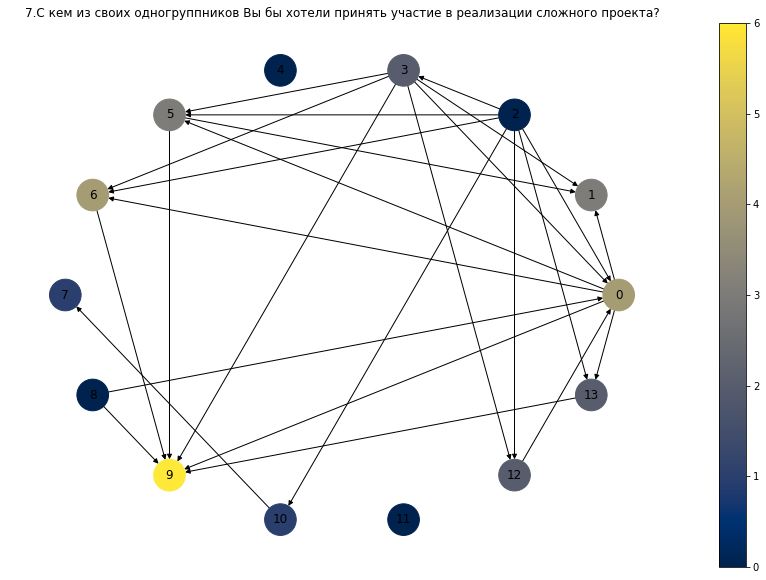

In [16]:
visualisation(M7,'M7')

### 8. С кем из своих одногруппников Вы бы НЕ хотели принять участие в реализации сложного проекта?

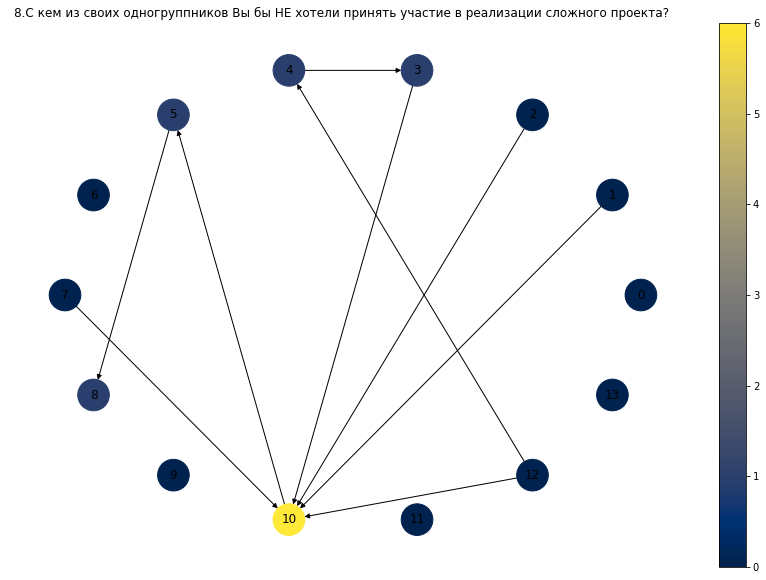

In [17]:
visualisation(M8,'M8')

### 9. Кого вы считаете своим другом

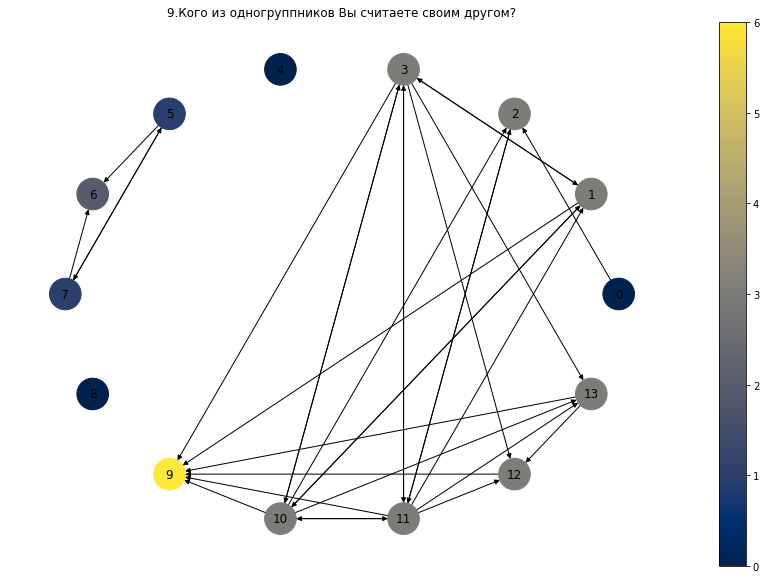

In [18]:
visualisation(M9,'M9')

## Part 2.Расчёт персональных социометрических статусов

## 2.1 Индекс социометрического статуса (ИСС)

In [19]:
def index_socio_status(question): 
    return question.loc['in'][:-3]/13

def positive_index_socio_status(question): 
    return question.loc['-'][:-3]/13

def negative_index_socio_status(question): 
    return question.loc['+'][:-3]/13

In [20]:
iss_df = pd.DataFrame({
    'ИСС "сидеть за одной партой"' : index_socio_status(question_1),
    'ИСС "день рождения"' : index_socio_status(question_2),
    'ИСС "староста"' : index_socio_status(question_3),
    'ИСС "сложный проект"' : index_socio_status(question_4),
    'ИСС "друзья"' : index_socio_status(question_5),
    'ИСС общий' : index_socio_status(summary)})

iss_df

,"ИСС ""сидеть за одной партой""","ИСС ""день рождения""","ИСС ""староста""","ИСС ""сложный проект""","ИСС ""друзья""",ИСС общий
0,0.076923,0.230769,0.000000,0.307692,0.000000,0.615385
1,0.153846,0.307692,0.615385,0.230769,0.230769,1.538462
2,0.230769,0.000000,0.615385,0.000000,0.230769,1.076923
3,0.230769,0.000000,0.153846,0.230769,0.230769,0.846154
4,0.000000,0.307692,0.461538,0.076923,0.000000,0.846154
5,0.153846,0.230769,0.000000,0.307692,0.076923,0.769231
6,0.076923,0.230769,0.000000,0.307692,0.153846,0.769231
7,0.384615,0.153846,0.076923,0.076923,0.076923,0.769231
8,0.153846,0.000000,0.153846,0.076923,0.000000,0.384615
9,0.000000,0.153846,0.000000,0.461538,0.461538,1.076923


In [21]:
iss_df.describe()

,"ИСС ""сидеть за одной партой""","ИСС ""день рождения""","ИСС ""староста""","ИСС ""сложный проект""","ИСС ""друзья""",ИСС общий
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.142857,0.219780,0.181319,0.208791,0.170330,0.923077
std,0.116297,0.150427,0.222959,0.163676,0.128641,0.303222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.384615
25%,0.076923,0.153846,0.000000,0.076923,0.076923,0.769231
50%,0.153846,0.230769,0.115385,0.192308,0.230769,0.846154
75%,0.211538,0.307692,0.211538,0.307692,0.230769,1.057692
max,0.384615,0.461538,0.615385,0.538462,0.461538,1.538462


Возможен также расчет отдельно положительного и отрициательного социометрического статуса

In [22]:
iss_df_positive = pd.DataFrame({
    'ИСС + "сидеть за одной партой"' : positive_index_socio_status(question_1),
    'ИСС + "день рождения"' : positive_index_socio_status(question_2),
    'ИСС + "староста"' : positive_index_socio_status(question_3),
    'ИСС + "сложный проект"' : positive_index_socio_status(question_4),
    'ИСС + "друзья"' : positive_index_socio_status(question_5),
    'ИСС + общий' : positive_index_socio_status(summary)})

iss_df_positive

,"ИСС + ""сидеть за одной партой""","ИСС + ""день рождения""","ИСС + ""староста""","ИСС + ""сложный проект""","ИСС + ""друзья""",ИСС + общий
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.076923,0.000000,0.0,0.076923
2,0.000000,0.000000,0.153846,0.000000,0.0,0.153846
3,0.076923,0.000000,0.153846,0.076923,0.0,0.307692
4,0.000000,0.000000,0.384615,0.076923,0.0,0.461538
5,0.000000,0.076923,0.000000,0.076923,0.0,0.153846
6,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.230769,0.000000,0.000000,0.000000,0.0,0.230769
8,0.000000,0.000000,0.153846,0.076923,0.0,0.230769
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [23]:
iss_df_positive.describe()

,"ИСС + ""сидеть за одной партой""","ИСС + ""день рождения""","ИСС + ""староста""","ИСС + ""сложный проект""","ИСС + ""друзья""",ИСС + общий
count,14.000000,14.000000,14.000000,14.000000,14.0,14.000000
mean,0.038462,0.027473,0.087912,0.054945,0.0,0.208791
std,0.083994,0.057304,0.116297,0.122293,0.0,0.203360
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.019231
50%,0.000000,0.000000,0.038462,0.000000,0.0,0.192308
75%,0.000000,0.000000,0.153846,0.076923,0.0,0.288462
max,0.230769,0.153846,0.384615,0.461538,0.0,0.692308


In [24]:
iss_df_negative = pd.DataFrame({
    'ИСС - "сидеть за одной партой"' : negative_index_socio_status(question_1),
    'ИСС - "день рождения"' : negative_index_socio_status(question_2),
    'ИСС - "староста"' : negative_index_socio_status(question_3),
    'ИСС - "сложный проект"' : negative_index_socio_status(question_4),
    'ИСС - "друзья"' : negative_index_socio_status(question_5),
    'ИСС - общий' : negative_index_socio_status(summary)})

iss_df_negative

,"ИСС - ""сидеть за одной партой""","ИСС - ""день рождения""","ИСС - ""староста""","ИСС - ""сложный проект""","ИСС - ""друзья""",ИСС - общий
0,0.076923,0.230769,0.000000,0.307692,0.000000,0.615385
1,0.153846,0.307692,0.538462,0.230769,0.230769,1.461538
2,0.230769,0.000000,0.461538,0.000000,0.230769,0.923077
3,0.153846,0.000000,0.000000,0.153846,0.230769,0.538462
4,0.000000,0.307692,0.076923,0.000000,0.000000,0.384615
5,0.153846,0.153846,0.000000,0.230769,0.076923,0.615385
6,0.076923,0.230769,0.000000,0.307692,0.153846,0.769231
7,0.153846,0.153846,0.076923,0.076923,0.076923,0.538462
8,0.153846,0.000000,0.000000,0.000000,0.000000,0.153846
9,0.000000,0.153846,0.000000,0.461538,0.461538,1.076923


In [25]:
iss_df_negative.describe()

,"ИСС - ""сидеть за одной партой""","ИСС - ""день рождения""","ИСС - ""староста""","ИСС - ""сложный проект""","ИСС - ""друзья""",ИСС - общий
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.104396,0.192308,0.093407,0.153846,0.170330,0.714286
std,0.071445,0.134086,0.178953,0.141518,0.128641,0.317059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846
25%,0.076923,0.153846,0.000000,0.019231,0.076923,0.557692
50%,0.115385,0.192308,0.000000,0.153846,0.230769,0.615385
75%,0.153846,0.288462,0.076923,0.230769,0.230769,0.884615
max,0.230769,0.461538,0.538462,0.461538,0.461538,1.461538


## 2.2 Индекс эмоциональной экспансивности

**Индекс экспансивности** характериует стремление каждого $j$-ого члена выбирать других, отражает потребности личности в общении, совместной деятельности

In [26]:
def index_emotional_expansiveness(question):
    return question['out'][:-3]/13

def positeve_index_emotional_expansiveness(question):
    return question['+'][:-3]/13

def negative_index_emotional_expansiveness(question):
    return question['-'][:-3]/13

In [27]:
iee_df = pd.DataFrame({
    'ИЭЭ "сидеть за одной партой"' : index_emotional_expansiveness(question_1),
    'ИЭЭ "день рождения"' : index_emotional_expansiveness(question_2),
    'ИЭЭ "староста"' : index_emotional_expansiveness(question_3),
    'ИЭЭ "сложный проект"' : index_emotional_expansiveness(question_4),
    'ИЭЭ "друзья"' : index_emotional_expansiveness(question_5),
    'ИЭЭ общий' : index_emotional_expansiveness(summary)})

iee_df

,"ИЭЭ ""сидеть за одной партой""","ИЭЭ ""день рождения""","ИЭЭ ""староста""","ИЭЭ ""сложный проект""","ИЭЭ ""друзья""",ИЭЭ общий
0,0.307692,0.384615,0.153846,0.384615,0.076923,1.307692
1,0.000000,0.076923,0.230769,0.076923,0.230769,0.615385
2,0.000000,0.000000,0.076923,0.615385,0.076923,0.769231
3,0.076923,0.615385,0.076923,0.615385,0.461538,1.846154
4,0.000000,0.153846,0.230769,0.076923,0.000000,0.461538
5,0.230769,0.000000,0.230769,0.230769,0.153846,0.846154
6,0.230769,0.307692,0.230769,0.153846,0.000000,0.923077
7,0.153846,0.153846,0.307692,0.076923,0.153846,0.846154
8,0.000000,0.307692,0.230769,0.153846,0.000000,0.692308
9,0.153846,0.000000,0.000000,0.000000,0.000000,0.153846


In [28]:
iee_df.describe()

,"ИЭЭ ""сидеть за одной партой""","ИЭЭ ""день рождения""","ИЭЭ ""староста""","ИЭЭ ""сложный проект""","ИЭЭ ""друзья""",ИЭЭ общий
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.142857,0.219780,0.181319,0.208791,0.170330,0.923077
std,0.170296,0.215167,0.140249,0.201109,0.186427,0.505770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846
25%,0.000000,0.019231,0.076923,0.076923,0.019231,0.615385
50%,0.115385,0.153846,0.192308,0.153846,0.115385,0.807692
75%,0.211538,0.365385,0.230769,0.230769,0.211538,1.211538
max,0.615385,0.615385,0.538462,0.615385,0.538462,1.846154


## 2.3 Объем коммуникации

In [29]:
def index_communication(question):
     return (question.loc['in'][:-3] + question['out'][:-3])/13

In [30]:
ic_df = pd.DataFrame({
    'ИЭЭ "сидеть за одной партой"' : index_communication(question_1),
    'ИЭЭ "день рождения"' : index_communication(question_2),
    'ИЭЭ "староста"' : index_communication(question_3),
    'ИЭЭ "сложный проект"' : index_communication(question_4),
    'ИЭЭ "друзья"' : index_communication(question_5),
    'ИЭЭ общий' :index_communication(summary)})

ic_df

,"ИЭЭ ""сидеть за одной партой""","ИЭЭ ""день рождения""","ИЭЭ ""староста""","ИЭЭ ""сложный проект""","ИЭЭ ""друзья""",ИЭЭ общий
0,0.384615,0.615385,0.153846,0.692308,0.076923,1.923077
1,0.153846,0.384615,0.846154,0.307692,0.461538,2.153846
2,0.230769,0.000000,0.692308,0.615385,0.307692,1.846154
3,0.307692,0.615385,0.230769,0.846154,0.692308,2.692308
4,0.000000,0.461538,0.692308,0.153846,0.000000,1.307692
5,0.384615,0.230769,0.230769,0.538462,0.230769,1.615385
6,0.307692,0.538462,0.230769,0.461538,0.153846,1.692308
7,0.538462,0.307692,0.384615,0.153846,0.230769,1.615385
8,0.153846,0.307692,0.384615,0.230769,0.000000,1.076923
9,0.153846,0.153846,0.000000,0.461538,0.461538,1.230769


In [31]:
ic_df.describe()

,"ИЭЭ ""сидеть за одной партой""","ИЭЭ ""день рождения""","ИЭЭ ""староста""","ИЭЭ ""сложный проект""","ИЭЭ ""друзья""",ИЭЭ общий
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.285714,0.439560,0.362637,0.417582,0.340659,1.846154
std,0.196530,0.244053,0.278870,0.253719,0.251919,0.604188
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.076923
25%,0.153846,0.307692,0.230769,0.230769,0.173077,1.480769
50%,0.269231,0.423077,0.230769,0.423077,0.307692,1.653846
75%,0.365385,0.596154,0.615385,0.596154,0.461538,2.096154
max,0.769231,0.923077,0.846154,0.846154,0.769231,3.230769


## 2.4 Индекс интенсивности взаимодействия

In [32]:
def q(question):
    a = np.sign(np.array(np.abs(question))[:14, : 14])
    b = a.copy()
    for i in range(14):
        for j in range(14):
            if a[i, j]*a[j, i] <= 0:
                b[i, j] = b[j, i] = 0
    return b

def intensity_interaction_index(quesion):
    a = index_communication(question_1)
    return q(question_1).dot(a)/(a.sum())

In [33]:
iii_df = pd.DataFrame({
    'ИИВ "сидеть за одной партой"' : intensity_interaction_index(question_1),
    'ИИВ "день рождения"' : intensity_interaction_index(question_2),
    'ИИВ "староста"' : intensity_interaction_index(question_3),
    'ИИВ "сложный проект"' : intensity_interaction_index(question_4),
    'ИИВ "друзья"' : intensity_interaction_index(question_5),
    'ИИВ общий' :intensity_interaction_index(summary)})

iii_df

,"ИИВ ""сидеть за одной партой""","ИИВ ""день рождения""","ИИВ ""староста""","ИИВ ""сложный проект""","ИИВ ""друзья""",ИИВ общий
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923
6,0.096154,0.096154,0.096154,0.096154,0.096154,0.096154
7,0.134615,0.134615,0.134615,0.134615,0.134615,0.134615
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
iii_df.describe()

,"ИИВ ""сидеть за одной партой""","ИИВ ""день рождения""","ИИВ ""староста""","ИИВ ""сложный проект""","ИИВ ""друзья""",ИИВ общий
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.053571,0.053571,0.053571,0.053571,0.053571,0.053571
std,0.084393,0.084393,0.084393,0.084393,0.084393,0.084393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.091346,0.091346,0.091346,0.091346,0.091346,0.091346
max,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
